# Do Not Delete!

In [1]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

In [2]:
# DO NOT REMOVE This
%reload_ext autoreload

In [3]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py

#import src.base with alias to avoid namespace clashes

from src import base as fis

Loading environment variables


In [4]:
fis.test_base()

Base Module Imported

Testing local imports
In clean_data
In Model
In Visualize
In custom module


# Import Libraries

In [2]:
# !pip install imblearn

# Dataframes
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Profiling
import pandas_profiling

# Data Preparation
    # Train:Test
from sklearn.model_selection import train_test_split
    # Normalize
from sklearn.preprocessing import normalize
    # Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
    # GridSearch
from sklearn.model_selection import GridSearchCV
    # PCA
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
    
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.spatial import distance

# Random Forest
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier  #Bagging & Random Forest
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
    # Visuals for Random Forest
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Logistic Regression
    # SK-learn
from sklearn.linear_model import LogisticRegression
    # Statsmodel
import statsmodels.api as sm
from patsy import dmatrices

from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from imblearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve

from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from sklearn.model_selection import StratifiedKFold

# Functions

In [3]:
def make_SMOTE_model(X_train, y_train, X_test, y_test, classifier):

# make pipeline 
    smote = SMOTE(random_state=1)

    pipe = make_pipeline(smote, classifier)
    model = pipe.fit(X_train, y_train)

# make predictions   
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)

# print scores  
    print('Train Precision: ' + str(metrics.precision_score(y_train, train_predictions)))
    print('Train Recall: ' + str(metrics.recall_score(y_train, train_predictions)))
    print('Train F1: ' + str(metrics.f1_score(y_train, train_predictions)))
    print('\n')
    print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
    print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
    print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))
    print('\n')
    
# print confusion matrix    
    cm = confusion_matrix(y_test, test_predictions)
    sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')

    tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
    print("Confusion Matrix:",'\nTN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)

# print 
    precision, recall, threshold = precision_recall_curve(y_test, test_predictions)
    fig = plt.figure(figsize=(12,6))
    plt.step(recall, precision, alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    
    
    precision, recall, threshold = precision_recall_curve(y_test, test_predictions)
    fig = plt.figure(figsize=(12,6))
    plt.step(recall, precision, alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    
    fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    return tn, fp, fn, tp


In [4]:
def make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, classifier):

# make pipeline 
    RU = RandomUnderSampler(random_state=10)
    

>>> X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
>>> y = np.array([0, 0, 1, 1])
>>> skf = cross_validation.StratifiedKFold(y, n_folds=2)
>>> len(skf)
2
>>> print(skf)  
sklearn.cross_validation.StratifiedKFold(labels=[0 0 1 1], n_folds=2,
                                         shuffle=False, random_state=None)
>>> for train_index, test_index in skf:
...    print("TRAIN:", train_index, "TEST:", test_index)
...    X_train, X_test = X[train_index], X[test_index]
...    y_train, y_test = y[train_index], y[test_index]

    pipe = make_pipeline(RU, classifier)
    model = pipe.fit(X_train, y_train)

# make predictions   
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)

# print scores  
    print('Train Precision: ' + str(metrics.precision_score(y_train, train_predictions)))
    print('Train Recall: ' + str(metrics.recall_score(y_train, train_predictions)))
    print('Train F1: ' + str(metrics.f1_score(y_train, train_predictions)))
    print('\n')
    print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
    print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
    print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))
    print('\n')
    
# print confusion matrix    
    cm = confusion_matrix(y_test, test_predictions)
    sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')

    tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
    print("Confusion Matrix:",'\nTN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)

    precision, recall, threshold = precision_recall_curve(y_test, test_predictions)
    fig = plt.figure(figsize=(12,6))
    plt.step(recall, precision, alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    
    fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    return tn, fp, fn, tp

SyntaxError: invalid syntax (<ipython-input-4-4f995ac3d1bb>, line 7)

# Data Importing

In [6]:
csv_name = '/Users/flatironschool/Desktop/Kelly/creditcard.csv'  #put as a string
df = pd.read_csv(csv_name)

FileNotFoundError: [Errno 2] File b'/Users/flatironschool/Desktop/Kelly/creditcard.csv' does not exist: b'/Users/flatironschool/Desktop/Kelly/creditcard.csv'

In [106]:
df[df.duplicated()]['Class'].value_counts()

0    1062
1      19
Name: Class, dtype: int64

In [107]:
# df.info()

# Data Cleaning

In [108]:
df.drop_duplicates(inplace=True)

In [109]:

# # Get the report
# df.profile_report()

# # retrieve the list of variables which are rejected due to high correlation:
# profile = df.profile_report()
# rejected_variables = profile.get_rejected_variables(threshold=0.9)

# # If you want to generate a HTML report file, save the ProfileReport to an object and use the to_file() function:
# profile = df.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="output.html")

In [110]:
secs_per_day = 86400
secs_per_hour = 3600
start = 3600 #1am
period1 = start + 3600*6 #1-7am
period2 = period1 + 3600*6 #7am-1pm
period3 = period2 + 3600*6 #1pm-7pm
period4 = period3 + 3600*5 #7am-12am

In [111]:
df['time_of_day']=df['Time'].apply(lambda x: x - secs_per_day if x >= secs_per_day else x)

In [112]:
df['time_of_day']=df['time_of_day'].apply(lambda x: 3 if x<start else x )
df['time_of_day']=df['time_of_day'].apply(lambda x: 0 if (x>=start) & (x<period1) else x )
df['time_of_day']=df['time_of_day'].apply(lambda x: 1 if (x>=period1) & (x<period2) else x )
df['time_of_day']=df['time_of_day'].apply(lambda x: 2 if (x>=period2) & (x<period3) else x )
df['time_of_day']=df['time_of_day'].apply(lambda x: 3 if (x>=period3) else x )

In [113]:
# df['time_of_day'][(df['time_of_day']<start)] = 3
# df['time_of_day'][(df['time_of_day']>=start) & (df['time_of_day']<period1)] = 0
# df['time_of_day'][(df['time_of_day']>=period1) & (df['time_of_day']<period2)] = 1
# df['time_of_day'][(df['time_of_day']>=period2) & (df['time_of_day']<period3)] = 2
# df['time_of_day'][(df['time_of_day']>=period3)] = 3

In [114]:
df['time_of_day'].value_counts()

2.0    97702
3.0    83808
1.0    81939
0.0    20277
Name: time_of_day, dtype: int64

In [115]:
df = df.drop(['Time'], axis=1)

In [116]:
# DON'T SCALE FOR RANDOM FOREST


from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
amount = pd.DataFrame(df['Amount'])
amount_scaled = rs.fit_transform(amount)
df['Amount']=amount_scaled

In [117]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_of_day
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0,3.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0,3.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0,3.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0,3.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0,3.0


## Get Dummies

In [118]:
x_feats = ['time_of_day']
df = pd.get_dummies(df, columns=x_feats)

In [119]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,Amount,Class,time_of_day_0.0,time_of_day_1.0,time_of_day_2.0,time_of_day_3.0
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.128539,-0.189115,0.133558,-0.021053,1.774718,0,0,0,0,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.167170,0.125895,-0.008983,0.014724,-0.268530,0,0,0,0,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0,0,0,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.647376,-0.221929,0.062723,0.061458,1.411487,0,0,0,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.206010,0.502292,0.219422,0.215153,0.667362,0,0,0,0,1


# Consider: Removing Extreme Outliers from the Misses

In [27]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,Amount,Class,time_of_day_0.0,time_of_day_1.0,time_of_day_2.0,time_of_day_3.0
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,-0.000232,0.000149,0.001763,0.000547,0.924387,0.001667,0.071467,0.288796,0.344353,0.295384
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.521220,0.482053,0.395744,0.328027,3.482123,0.040796,0.257603,0.453204,0.475158,0.456216
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-10.295397,-2.604551,-22.565679,-15.430084,-0.305938,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.317485,-0.326763,-0.070641,-0.052818,-0.228063,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,0.016278,-0.052172,0.001479,0.011288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.350667,0.240261,0.091208,0.078276,0.771937,0.000000,0.000000,1.000000,1.000000,1.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,7.519589,3.517346,31.612198,33.847808,356.962314,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
low = .01
high = .99
quant_df = df.quantile([low, high])
print(quant_df)

            V1        V2        V3        V4        V5        V6        V7  \
0.01 -6.498966 -4.960666 -3.950781 -3.124264 -3.036290 -2.123921 -2.983436   
0.99  2.237325  3.766340  2.725875  4.244400  3.426968  4.199590  2.680019   

            V8        V9       V10  ...       V25       V26       V27  \
0.01 -4.013525 -2.454438 -2.091204  ... -1.421142 -1.006787 -1.216691   
0.99  2.044163  2.976341  3.190847  ...  1.203774  1.158956  0.929101   

           V28     Amount  Class  time_of_day_0.0  time_of_day_1.0  \
0.01 -0.867997  -0.304269    0.0              0.0              0.0   
0.99  0.537711  13.864066    0.0              1.0              1.0   

      time_of_day_2.0  time_of_day_3.0  
0.01              0.0              0.0  
0.99              1.0              1.0  

[2 rows x 34 columns]


## Save cleaned dataframe

In [103]:
df.to_csv('../data/processed/cleaned_dataframe.csv.gz', compression='gzip', index=False)


In [120]:
df.to_csv('../data/processed/cleaned_dataframe_scaled.csv.gz', compression='gzip', index=False)


# Start with clean data

In [121]:
df_cleaned = pd.read_csv('../data/processed/cleaned_dataframe.csv.gz', compression='gzip')
df_cleaned.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,Amount,Class,time_of_day_0.0,time_of_day_1.0,time_of_day_2.0,time_of_day_3.0
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,0,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,0,1


## Train-Test Split

In [5]:
X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
print("No. of samples in each training set:", X_train.shape[0])
print("No. of samples in each test set:", X_test.shape[0])

NameError: name 'df' is not defined

In [86]:
    
#split data into 3 folds for cross validation

def cv_model(X_train, X_test, y_train, y_test, model):

    skf = StratifiedKFold(n_splits=3, random_state=10)
    from itertools import combinations

    folds = [i for i in skf.split(X_train,y_train)]

    for i in folds:
        X_train = i[0]
        y_train = i[1]
        X_test = 
        y_test = 
        
        smote = SMOTE(random_state=1)

        pipe = make_pipeline(smote, classifier)
        model = pipe.fit(X_train, y_train)

    # make predictions   
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        pred_proba = model.predict_proba(X_test)
    
# print scores  
    print('Train Precision: ' + str(metrics.precision_score(y_train, train_predictions)))
    print('Train Recall: ' + str(metrics.recall_score(y_train, train_predictions)))
    print('Train F1: ' + str(metrics.f1_score(y_train, train_predictions)))
    print('\n')
    print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
    print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
    print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))
    print('\n')    

66204
66202
66202


# Data Visualization

In [32]:
# Save the model as a png file
# png_filename = NONE.png
# plt.savefig('../reports/figures/{}'.format(png_filename), bbox_inches='tight')

## Gaussian Bayes

Train Precision: 0.05537206139498737
Train Recall: 0.8610271903323263
Train F1: 0.104052573932092


Test Precision: 0.05441860465116279
Test Recall: 0.823943661971831
Test F1: 0.10209424083769635


Confusion Matrix: 
TN: 82943 FP: 2033 FN: 25 TP: 117


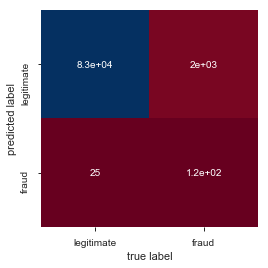

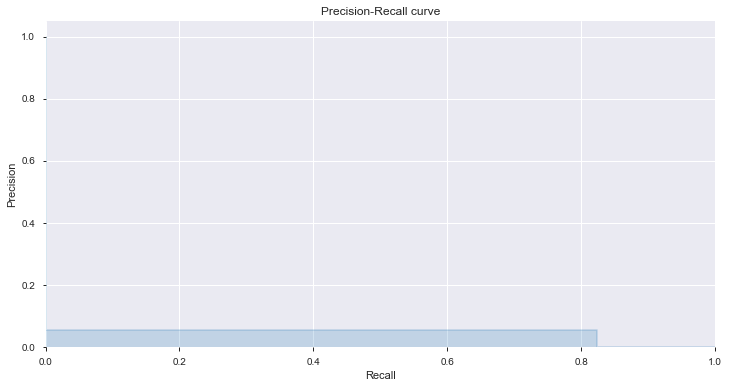

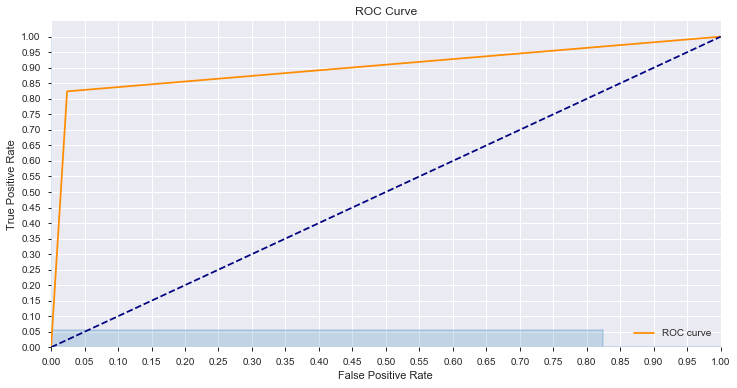

In [33]:
tn, fp, fn, tp = make_SMOTE_model(X_train, y_train, X_test, y_test, GaussianNB())

In [34]:
# cost_fp = 
# cost_tn = 0
# cost_fn = 
# cost_tp = 

# m = ((1 - (tp + fn) / (tn + fp + fn + tp))/((tp + fn)/(tn + fp + fn + tp))) * ((cost_fp - cost_tn) / (cost_fn - cost_tp))
# c = (tp/(tp + fn)) - m * (1-(tn/(tn + fp)))

Train Precision: 0.028096441765506512
Train Recall: 0.8731117824773413
Train F1: 0.05444099086370914


Test Precision: 0.027860242064398265
Test Recall: 0.8591549295774648
Test F1: 0.0539703605397036


Confusion Matrix: 
TN: 80719 FP: 4257 FN: 20 TP: 122


(80719, 4257, 20, 122)

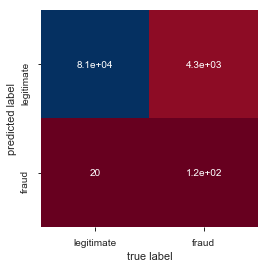

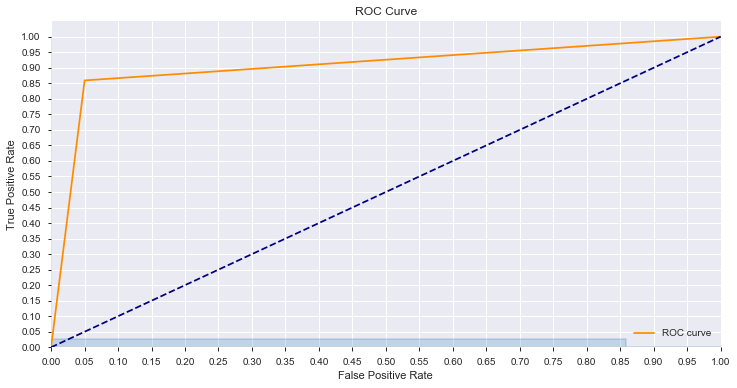

In [35]:
make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, GaussianNB())

In [37]:
# try a higher threshold for predicting a hit
# new_predictions = []
# for i in range(len(predictions)):
#     if pred_proba[i][1] >= .3:
#         new_predictions.append(1)
#     else:
#         new_predictions.append(0)
    
# print('Precision: ' + str(metrics.precision_score(y_test, new_predictions)))
# print('Recall: ' + str(metrics.recall_score(y_test, new_predictions)))
# print('F1: ' + str(metrics.f1_score(y_test, new_predictions)))

# cm = confusion_matrix(y_test, new_predictions)
# # cm = cm / cm.astype(np.float).sum(axis=0)
# sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
#             xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
# plt.xlabel('true label')
# plt.ylabel('predicted label')

# tn, fp, fn, tp = confusion_matrix(y_test, new_predictions).ravel()
# (tn, fp, fn, tp)

# KNN

In [ ]:
# df_knn = df_cleaned.copy()

In [ ]:
make_SMOTE_model(X_train, y_train, X_test, y_test, KNeighborsClassifier(n_neighbors=9))

In [ ]:
make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, KNeighborsClassifier(n_neighbors=9))

In [ ]:
# F1 score by K values + visualization for k Scores
import matplotlib.pyplot as plt
def f1_by_k_value(X_res, y_res, X_test, y_test, krange_min=1,krange_max=50):
    '''calculate the F1 score by k-value and plot a visualizat_ion'''
    # Build list of k-scores
    k_range = list(range(krange_min, krange_max))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        score = metrics.f1_score(y_test, y_predict, average='weighted')
        k_scores.append( score)
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('F1 score by K Value')
    plt.xlabel('K Value')
    plt.ylabel('F1 Score')
    plt.show()

f1_by_k_value(X_train, y_train, X_test, y_test, krange_min=1,krange_max=50)

In [ ]:
knn.get_params().keys()

In [ ]:
# gridsearch
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [6, 8, 10],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
            
scores = 'f1'


# 'leaf_size' : [10, 20],

gs = GridSearchCV(KNeighborsClassifier(n_jobs = 3), param_grid=parameters, scoring=scores, cv = 3)
# n_jobs=3 can speed up the process
# verbose tells you what's going on
gs.fit(X_res, y_res)



# Logistic Regression

In [24]:
# df_log_reg = df_cleaned.copy()

Train Precision: 0.05784812511776898
Train Recall: 0.9274924471299094
Train F1: 0.10890386661936857


Test Precision: 0.056028686687584046
Test Recall: 0.8802816901408451
Test F1: 0.10535187526337969


Confusion Matrix: 
TN: 82870 FP: 2106 FN: 17 TP: 125


(82870, 2106, 17, 125)

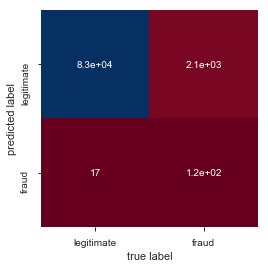

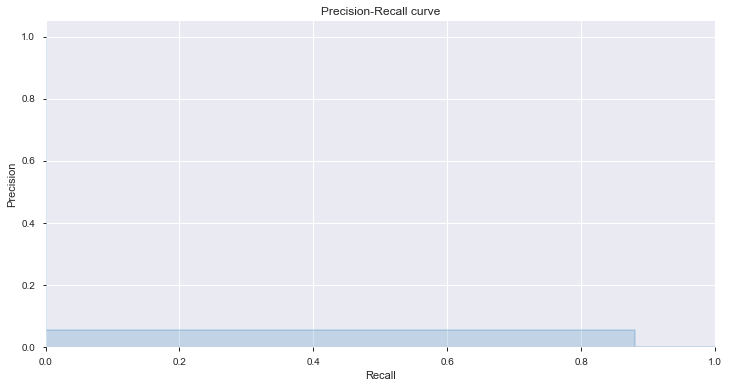

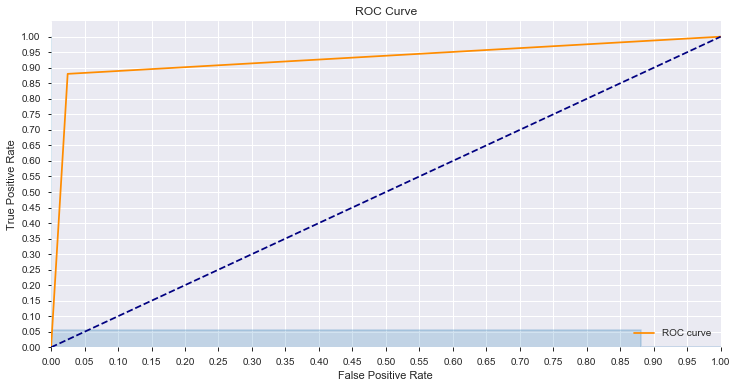

In [38]:
make_SMOTE_model(X_train, y_train, X_test, y_test, LogisticRegression(fit_intercept = False, C = 1e12))

Train Precision: 0.03695806680881308
Train Recall: 0.9425981873111783
Train F1: 0.07112732246665908


Test Precision: 0.03456858407079646
Test Recall: 0.8802816901408451
Test F1: 0.06652474720596062


Confusion Matrix: 
TN: 81485 FP: 3491 FN: 17 TP: 125


(81485, 3491, 17, 125)

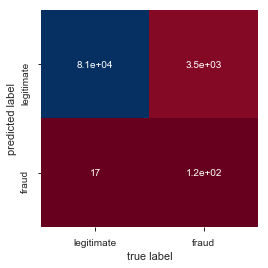

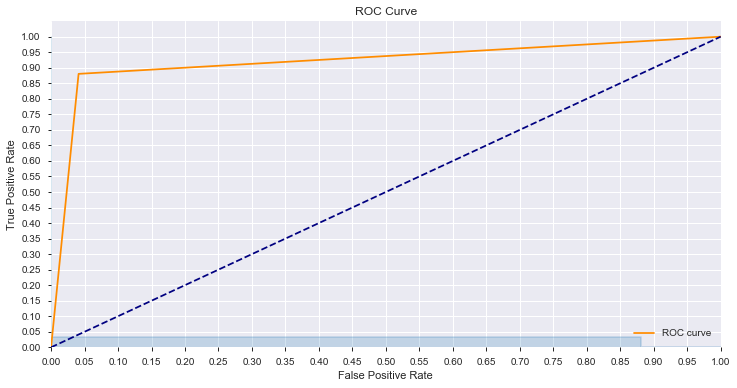

In [39]:
make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, LogisticRegression(fit_intercept = False, C = 1e12))

In [27]:
# Adam's code for SKlearn

# Get dummies for the columns we're interested if

# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(fit_intercept = False, C = 1e12)
# model_log = logreg.fit(X_res, y_res)
#     # Predict
# y_hat_test = logreg.predict(X_test)
# y_hat_train = logreg.predict(X_res)
#         # Classifier correctness on training data
# residuals = np.abs(y_res - y_hat_train)
# print(pd.Series(residuals).value_counts())
# print(pd.Series(residuals).value_counts(normalize=True))
# correct = pd.Series(residuals).value_counts(normalize=True)[0]
# print('\nOur model is {}% accurate for our training data'.format(round(correct*100,2)))
#         # Classifier correctness on testing data
# residuals = np.abs(y_test - y_hat_test)
# print(pd.Series(residuals).value_counts(),'\n')
# print(pd.Series(residuals).value_counts(normalize=True))
# correct = pd.Series(residuals).value_counts(normalize=True)[0]
# print('\nOur model is {}% accurate for our test data'.format(round(correct*100,2)))

In [29]:
# cm = confusion_matrix(y_test, y_hat_test)
# # cm = cm / cm.astype(np.float).sum(axis=0)
# sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
#             xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
# plt.xlabel('true label')
# plt.ylabel('predicted label')

# tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
# (tn, fp, fn, tp)



In [31]:
# # Adam's Code Statsmodel version

# # Define X and Y
# y, X = dmatrices('target ~ col1 + C(categorical_col) + col3' ,
#                   df, return_type = "dataframe")

# # Fit the 1st model
# logit_model = sm.Logit(y,X)
# result = logit_model.fit()
#     # See results of 1st model
# model1_summary = result.summary()
# model1_summary

# # Drop rubbish pvalues
# alpha = 0.05
# variables_to_keep = []
# for X_variable, pvalue in list(zip(X,result.pvalues)):
#     if pvalue <= alpha:
#         variables_to_keep.append(X_variable)
# variables_to_keep  # leaves behind the variables that have p value below the alpha
# X = X.drop(columns=variables_to_keep)  # take out the variables

# # Fit the 2nd model
# logit_model = sm.Logit(y, X)
# result = logit_model.fit()
#     # see results of 2nd model
# model2_summary = result.summary()
# model2_summary

# Random Forest

In [ ]:
# df_random = df_cleaned.copy()

Train Precision: 0.5437392795883362
Train Recall: 0.9577039274924471
Train F1: 0.6936542669584246


Test Precision: 0.4831932773109244
Test Recall: 0.8098591549295775
Test F1: 0.6052631578947368


Confusion Matrix: 
TN: 84853 FP: 123 FN: 27 TP: 115


(84853, 123, 27, 115)

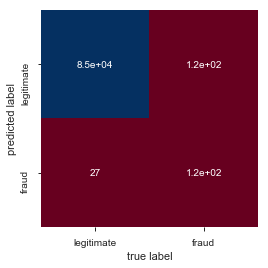

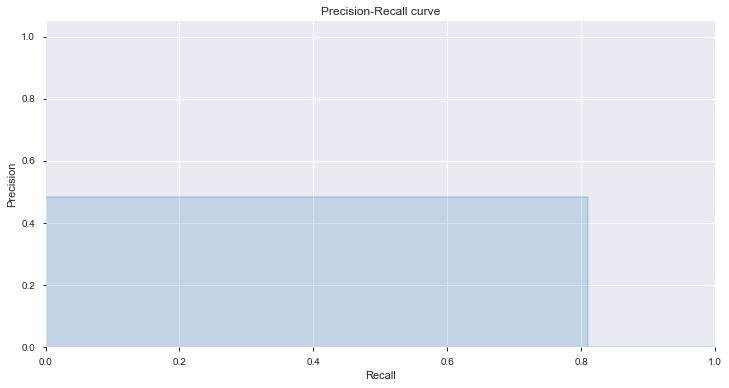

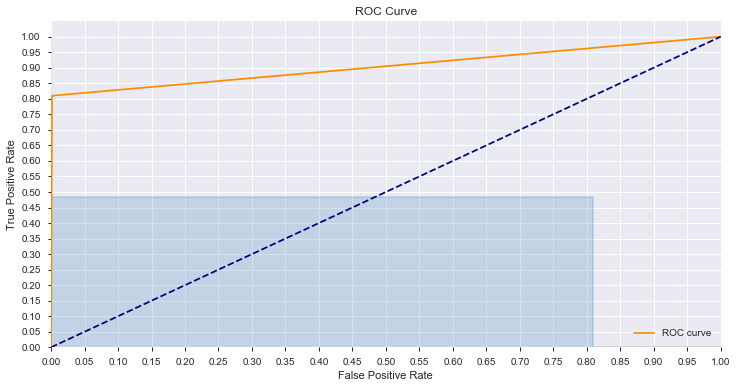

In [42]:
make_SMOTE_model(X_train, y_train, X_test, y_test, RandomForestClassifier(max_depth=10))



Train Precision: 0.034574468085106384
Train Recall: 0.9818731117824774
Train F1: 0.06679683485767135


Test Precision: 0.029095354523227385
Test Recall: 0.8380281690140845
Test F1: 0.05623818525519849


Confusion Matrix: 
TN: 81005 FP: 3971 FN: 23 TP: 119


(81005, 3971, 23, 119)

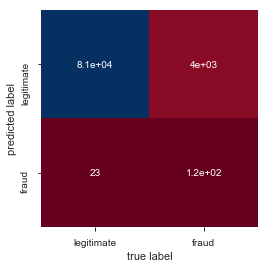

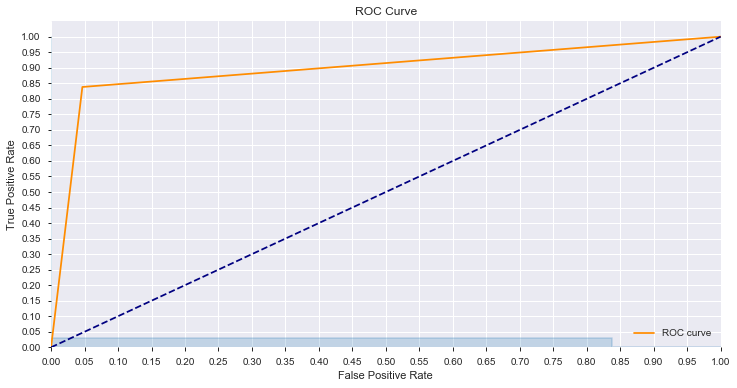

In [41]:
make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, RandomForestClassifier(max_depth=10))



In [ ]:
# Adam's Code

# classifier = DecisionTreeClassifier(random_state=10)
# classifier.fit(X_res, y_res)
# y_pred = classifier.predict(X_test)

# acc = accuracy_score(y_test,y_pred) * 100
# print("Accuracy is : {}%".format(round(acc, 2)))
# #     # Check the AUC for predictions
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print("\nAUC is :{0}".format(round(roc_auc,2)))
#     # Create and print a confusion matrix
# print('\nConfusion Matrix')
# print('----------------')
# pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# # Train a DT classifier
# classifier2 = DecisionTreeClassifier(random_state=10, criterion='entropy')
# classifier2.fit(X_res, y_res)
#     # Make predictions for test data
# y_pred = classifier2.predict(X_test)
#     # Calculate Accuracy
# acc = accuracy_score(y_test,y_pred) * 100
# print("Accuracy is :{0}".format(acc))
#     # Check the AUC for predictions
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print("\nAUC is :{0}".format(round(roc_auc,2)))
#     # Create and print a confusion matrix
# print('\nConfusion Matrix')
# print('----------------')
# print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


# # Function for plotting feature importance
# classifier2.feature_importances_ # How much does this feature reduce entropy
#     # Function to show importance of each feature
# def plot_feature_importances(model):
#     '''plots the importance of each feature.  Useful for something like KNN so you can tell which features are useful '''
#     n_features = X_train.shape[1]
#     plt.figure(figsize=(8,8))
#     plt.barh(range(n_features), model.feature_importances_, align='center')
#     plt.yticks(np.arange(n_features), X_train.columns.values)
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
# plot_feature_importances(classifier2)
#     # confusion matrix print
# pred = classifier2.predict(X_test)
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred))

# # Random Forest in code
# forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
# forest.fit(X_train, y_train)
# forest.score(X_train, y_train) # Accuracy of training data
# forest.score(X_test, y_test) # Accuracy of test data
# plot_feature_importances(forest) # plot using function above

# # Fine Tune the model
# forest_2 = RandomForestClassifier(n_estimators = 10, max_features= 2, max_depth= 2)
# forest_2.fit(X_train, y_train)
# forest_2.score(X_train, y_train) # Accuracy of training data
# forest_2.score(X_test, y_test)  # Accuracy of test data

# Use GridsearchCV to find the best Number
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [30, 100, 300], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]}
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
gs.fit(X_res, y_res)
print('Mean accuracy on the given test data and labels:', gs.score(X_test, y_test))
print('The best parameters are:', gs.best_params_)


## Bagged Trees

In [61]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

Train Precision: 0.07073665239918901
Train Recall: 0.9486404833836858
Train F1: 0.13165618448637317


Test Precision: 0.0646900269541779
Test Recall: 0.8450704225352113
Test F1: 0.12018027040560843


Confusion Matrix: 
TN: 83241 FP: 1735 FN: 22 TP: 120


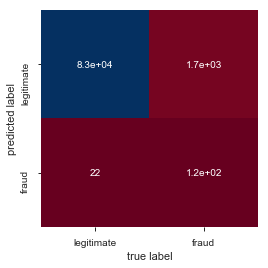

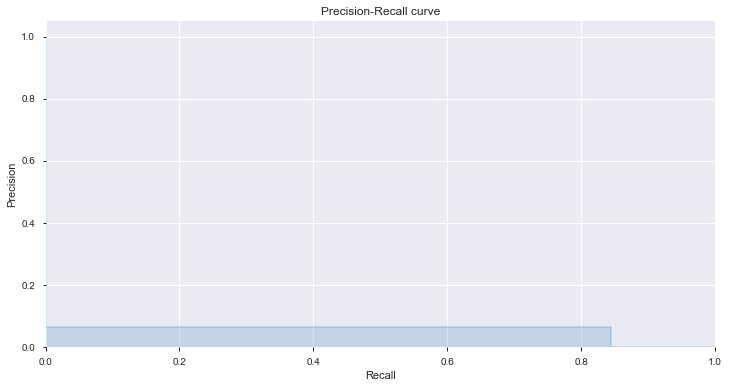

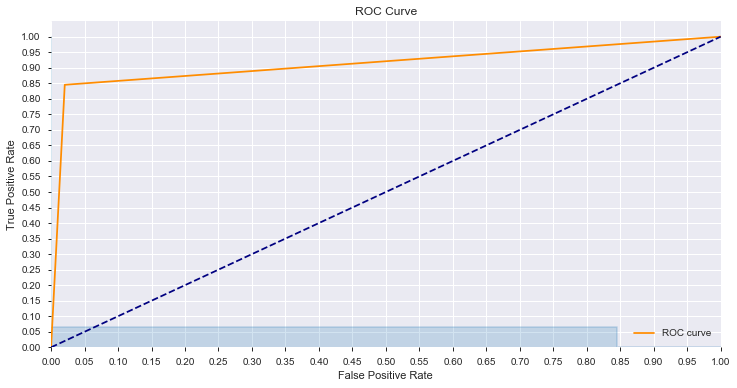

In [62]:
make_SMOTE_model(X_train, y_train, X_test, y_test, BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20))


Train Precision: 0.038005325587024935
Train Recall: 0.9486404833836858
Train F1: 0.07308274176655417


Test Precision: 0.03534777651083238
Test Recall: 0.8732394366197183
Test F1: 0.06794520547945204


Confusion Matrix: 
TN: 81592 FP: 3384 FN: 18 TP: 124


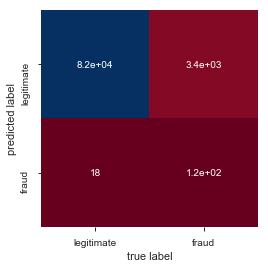

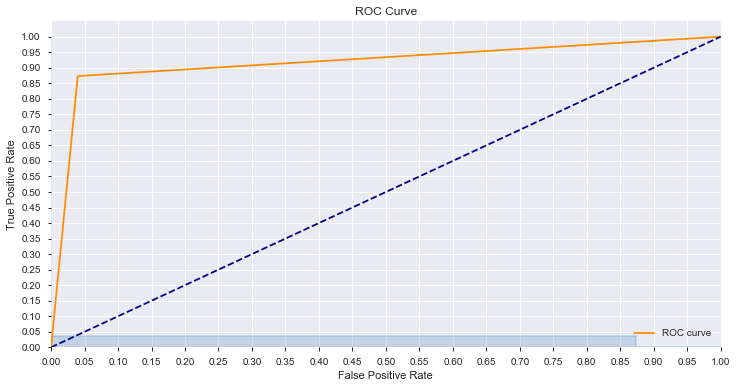

In [63]:
make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20))


Train Precision: 0.026792681869418192
Train Recall: 0.9335347432024169
Train F1: 0.05209035738368173


Test Precision: 0.025746652935118436
Test Recall: 0.8802816901408451
Test F1: 0.05003001801080648


Confusion Matrix: 
TN: 80246 FP: 4730 FN: 17 TP: 125


(80246, 4730, 17, 125)

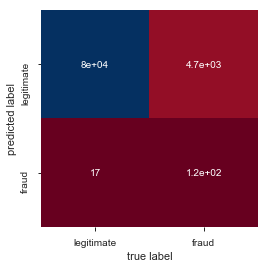

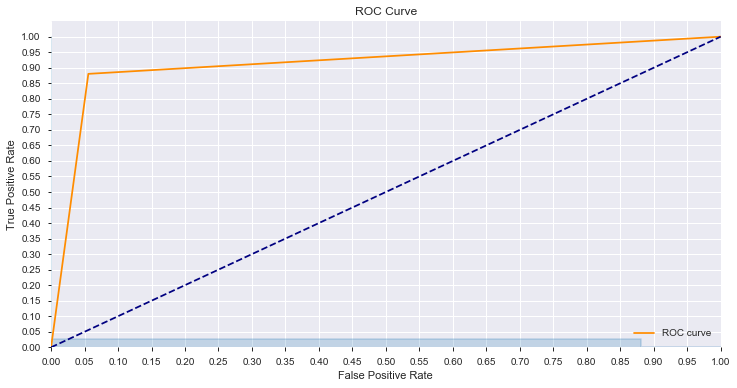

In [43]:
make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, SVC(probability=True))

# Cost Function